<img src='https://www.di.uniroma1.it/sites/all/themes/sapienza_bootstrap/logo.png' width="200"/> 

# **Part_1_6_Spelling Correction and Minimum Edit Distance**

In Natural Language Processing (NLP), spelling correction is a critical step in ensuring accurate text analysis and user experience, especially in applications like search engines, chatbots, and automated text editors. Spelling correction relies on calculating word similarity, where **Minimum Edit Distance** is an essential technique. By determining the minimum number of edits required to transform one word into another, this technique allows us to identify the closest match for a misspelled word from a list of known words.

Using the **NLTK library**, specifically the `nltk.metrics.distance` module, we can compute edit distances efficiently, making it easy to implement a spelling corrector without needing to manually build the algorithm from scratch. This tutorial guides you through understanding and implementing minimum edit distance with NLTK, creating a basic spelling corrector, and testing its performance with real examples.



### **Objectives:**


By the end of this notebook, Parham will have a thorough understanding of **Minimum Edit Distance** and how it applies to word similarity in spelling correction. He will learn to use **NLTK’s `edit_distance` function** to calculate the minimum number of edits between two words, which serves as the foundation for identifying and ranking correction candidates for misspelled words. Finally, through implementing a basic spelling corrector, Parham will gain hands-on experience in generating possible corrections and selecting the most likely match based on edit distance.

### **References**: 
- [https://stanford.edu/~jurafsky/slp3/slides/2_EditDistance_2023.pdf](https://stanford.edu/~jurafsky/slp3/slides/2_EditDistance_2023.pdf)
- [https://en.wikipedia.org/wiki/Levenshtein_distance](https://en.wikipedia.org/wiki/Levenshtein_distance)
- [https://github.com/athlohangade/minimum-edit-distance](https://github.com/athlohangade/minimum-edit-distance)

### **Tutors**:
- Professor Stefano Farali
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: Stefano.faralli@uniroma1.it
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/stefano-faralli-b1183920/) 
- Professor Iacopo Masi
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: masi@di.uniroma1.it  
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/iacopomasi/)  
    - <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Github-desktop-logo-symbol.svg" alt="Logo" width="20" height="20"> **GitHub**: [GitHub](https://github.com/iacopomasi)  
    
### **Contributors**:
- Parham Membari
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: p.membari96@gmail.com
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/p-mem/)
    - <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Github-desktop-logo-symbol.svg" alt="Logo" width="20" height="20"> **GitHub**:  [GitHub](https://github.com/parham075)
    - <img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Medium_logo_Monogram.svg" alt="Logo" width="20" height="20"> **Medium**: [Medium](https://medium.com/@p.membari96)
    
### **Table of Contents:**
1. Import Libraries
2. Minimum Edit Distance with NLTK
3. Building a Simple Spelling Corrector
4. Closing Thoughts

## 1. Import Libraries

In [ ]:
import os
import nltk
from nltk.metrics import distance
from loguru import logger 
import matplotlib.pyplot as plt
import numpy as np 
from nltk.util import ngrams
from collections import Counter 
from nltk.corpus import words
import pandas as pd

## 2. Minimum Edit Distance with NLTK

Minimum Edit Distance is a key concept in Natural Language Processing (NLP) used to measure how dissimilar two strings are by calculating the minimum number of operations required to transform one string into another. These operations typically include insertion, deletion, and substitution of characters. In this section, we will explore how to compute the edit distance using the **NLTK** library's `nltk.metrics.distance` module.

#### **2.1 Distance Metrics**

In mathematical terms, a distance metric `d` must satisfy three fundamental properties for it to be a valid measure of distance:

1. **Identity**: The distance between two identical items is zero. 
$$d(a, a) = 0$$  

2. **Non-negativity**: The distance between two different items is always greater than or equal to zero. 
$$d(a, b) \geq 0$$  

3. **Triangle Inequality**: The distance between two items cannot exceed the sum of the distances between them through a third item. 
$$d(a, c) \leq d(a, b) + d(b, c)$$ 

These properties ensure that distance metrics behave in a consistent and predictable manner.

#### **2.2 NLTK Metrics Overview**

The `nltk.metrics.distance` module provides various functions to compute different types of distances. Below are some of the key functions available in this module:

#### Binary Distance: 
A simple equality test that returns `0.0` if two labels are identical and `1.0` if they are different.




In [3]:
def binary_distance(label1, label2):
    """Simple equality test.
    0.0 if the labels are identical, 1.0 if they are different.
    """
    return 0.0 if label1 == label2 else 1.0
binary_distance(1,1), binary_distance(3,15)

(0.0, 1.0)

using nltk:

In [4]:
d1 = distance.binary_distance(1,1)
d2 = distance.binary_distance(3,15)
d1 , d2

(0.0, 1.0)

#### Edit Distance: 
The minimum edit distance is calculated based on three primary operations:

- **Insertion**: Adding a character to the string.
- **Deletion**: Removing a character from the string.
- **Substitution**: Replacing one character with another.

For example, transforming the word "kitten" to "sitting" requires:

1. Substitute `k` with `s` → sitten
2. Substitute `e` with `i` → sittin
3. Insert `g` at the end → sitting



**How Edit Distance works in NLTK**

The `edit_distance` function in NLTK computes the `Levenshtein distance` between two strings. The `Levenshtein distance` measures how dissimilar two strings are by calculating the minimum number of single-character edits required to change one string into the other. These edits can be insertions, deletions, or substitutions.

The edit distance algorithm uses dynamic programming to build a matrix that represents the costs of converting the first string into the second string. Here’s how it works step-by-step:

1. **Matrix Initialization**:
   - Create a matrix (2D array) with dimensions $$(m+1) \times (n+1)$$
    where `m` is the length of the first string and `n` is the length of the second string.

   - Initialize the first row and the first column:
     - The first row represents the cost of converting an empty string to the second string (which involves `n` insertions).
     - The first column represents the cost of converting the first string to an empty string (which involves `m` deletions).

2. **Filling the Matrix**:

   - Iterate through each character of both strings.
   - For each character, calculate the cost of insertion, deletion, and substitution, and fill the matrix with the minimum cost for each combination of characters.
   - The formula to fill in the matrix is:
    
$$
D(i, j) = \min 
\begin{cases} 
    D(i-1, j) + 1 & \text{(deletion)} \\
    D(i, j-1) + 1 & \text{(insertion)} \\
    D(i-1, j-1) + 
    \begin{cases}
       1 & \text{; } & \quad \text{if } S_1(i) \neq S_2(j) \\
       0 & \text{; } & \quad \text{if } S_1(i) = S_2(j)
    \end{cases} & \text{(substitution)}
\end{cases}
$$




   - Here, the cost is 0 if the characters are the same and 1 if they are different.

3. **Retrieve the Result**:
   - The bottom-right cell of the matrix contains the edit distance between the two strings, which represents the minimum number of edits required to convert the first string into the second.

#### **2. Parameters of the `edit_distance` Function**

The `edit_distance` function allows for several optional parameters:

- **`s1` (str)**: The first string to compare.
- **`s2` (str)**: The second string to compare.
- **`substitution_cost` (int)**: The cost of a substitution operation. By default, this is set to 1. You can change this if you want to assign different penalties for certain substitutions.
- **`transpositions` (bool)**: A boolean flag indicating whether to allow transposition edits (swapping adjacent characters). This is disabled by default.

> Note: For more information please check [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) 


In [29]:
def calculate_edit_distance_with_matrix(s1, s2):
    m, n = len(s1), len(s2)
    
    # Initialize the distance matrix
    D = np.zeros((m + 1, n + 1), dtype=int)
    
    # Fill the first row and first column
    for i in range(1, m + 1):
        D[i][0] = i  # Cost of deletion
    for j in range(1, n + 1):
        D[0][j] = j  # Cost of insertion

    # Compute the edit distance and fill the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # Calculate substitution cost based on character match
            substitution_cost = 0 if s1[i - 1] == s2[j - 1] else 1
            
            D[i][j] = min(
                D[i - 1][j] + 1,         # Deletion
                D[i][j - 1] + 1,         # Insertion
                D[i - 1][j - 1] + substitution_cost  # Substitution
            )

    return D



def visualize_distance_matrix(matrix, s1, s2, title = "Edit Distance Matrix"):
    plt.figure(figsize=(10, 6))
    plt.imshow(matrix, interpolation=None)
    plt.colorbar()
    
    plt.xticks(np.arange(len(s2) + 1), [''] + list(s2))
    plt.yticks(np.arange(len(s1) + 1), [''] + list(s1))
    
    for (i, j), val in np.ndenumerate(matrix):
        plt.text(j, i, f'{val}', ha='center', va='center', color='white')
    
    plt.title(title)
    plt.xlabel('String 2')
    plt.ylabel('String 1')
    plt.grid(False)
    plt.show()



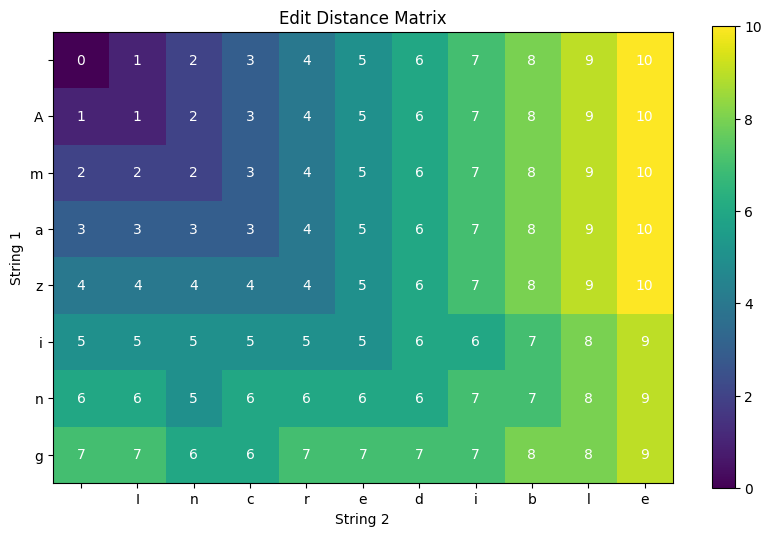

2024-11-03 17:57:09.119 | INFO     | __main__:<module>:15 - The Levenshtein distance between Amazing, Incredible is: 9


In [30]:
# Define the two strings
s1 = "Amazing"
s2 = "Incredible"

# Calculate the edit distance matrix
distance_matrix = calculate_edit_distance_with_matrix(s1, s2)

# Visualize the distance matrix
visualize_distance_matrix(distance_matrix, s1, s2)

# Output the final edit distance
final_distance = distance_matrix[-1][-1]
blue_color = "\033[94m"
reset_color = "\033[0m"
logger.info(f'The Levenshtein distance between {blue_color}{s1}, {s2}{reset_color} is: {final_distance}')


**Exercise**: Calculate  The `Levenshtein distance` using `nltk.metrics.distance.edit_distance`

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution
blue_color = "\033[94m"
reset_color = "\033[0m"
logger.info(f'The Levenshtein distance between {blue_color}{s1}, {s2}{reset_color} is: {distance.edit_distance(s1,s2,transpositions=False)}')


2024-11-03 18:14:36.815 | INFO     | __main__:<module>:4 - The Levenshtein distance between Amazing, Incredible is: 9


To calculate the minimum `Levenshtein` edit-distance based alignment mapping between two strings. The alignment finds the mapping from string `s1` to `s2` that minimizes the edit distance cost. 

For example, mapping `rain` to `shine` would involve 2 substitutions, 2 matches and an insertion resulting in the following mapping: 

mapping: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (4, 5)] 

`NB`: (0, 0) is the start state without any letters associated

In case of multiple valid minimum-distance alignments, the backtrace has the following operation precedence:

- Substitute s1 and s2 characters

- Skip s1 character

- Skip s2 character

The backtrace is carried out in reverse string order.

In [51]:
distance.edit_distance_align(s1, s2, substitution_cost=1)

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (5, 8),
 (6, 9),
 (7, 10)]

**Jaccard Distance**: 

Jaccard Distance measures the dissimilarity between two sets. To implement this using nltk, you can create sets of tokens from the strings and then calculate the Jaccard distance.

In [ ]:

def jaccard_distance_example(str1, str2):
    """
    Calculate the Jaccard distance between two strings.
    This converts the strings into sets of bigrams (or n-grams).
    """
    # Create ngrams 
    set1 = set(ngrams(str1, 4))
    set2 = set(ngrams(str2, 4))
    
    return distance.jaccard_distance(set1, set2)

string_a = "hello"
string_b = "hellow"
DISTANCE = jaccard_distance_example(string_a, string_b)
print(f"Jaccard Distance between '{string_a}' and '{string_b}':", DISTANCE)



Jaccard Distance between 'hello' and 'hellow': 0.3333333333333333


**Jaro Similarity**

**Jaro Similarity** is a metric used to measure the similarity between two sequences, typically strings. It is especially useful in applications like name matching, where slight variations may occur. The Jaro similarity is defined as:

$$
\text{Jaro Similarity} = \begin{cases} \frac{1}{3} \left( \frac{m}{|s_1|} + \frac{m}{s_2} + \frac{m-t}{m} \right) \\
0 \text{;} &  \text{if} & m = 0 \end{cases}
$$

where
- |s_i| is the length of string s_i
- m is the number of matching characters
- t is the half number of possible transpositions.

In [99]:
distance.jaro_similarity(s1, s2)

0.32857142857142857

**Exercise**: Implement `jaro_similarity` which was calculated in the previous cell out of the `nltk` library.

In [ ]:
# @title 🧑🏿‍💻 Your code here

In [ ]:
# @title 👀 Solution

def jaro_similarity(s1, s2):
        
    len_s1 = len(s1)
    len_s2 = len(s2)

    # If both strings are empty, return a similarity of 1.0
    if len_s1 == 0 and len_s2 == 0:
        return 1.0

    # Calculate the maximum allowable match distance
    match_distance = (max(len_s1, len_s2) // 2) - 1

    # Initialize match tracking variables
    matches = 0
    s1_matches = [False] * len_s1
    s2_matches = [False] * len_s2

    # Count matches between the two strings
    for i in range(len_s1):
        for j in range(max(0, i - match_distance), min(len_s2, i + match_distance + 1)):
            if s1[i] == s2[j] and not s2_matches[j]:
                s1_matches[i] = True
                s2_matches[j] = True
                matches += 1
                break

    # If no matches were found, the Jaro similarity is 0.0
    if matches == 0:
        return 0.0

    # Count the number of transpositions
    transpositions = 0
    point = 0
    for i in range(len_s1):
        if s1_matches[i]:
            while not s2_matches[point]:
                point += 1
            if s1[i] != s2[point]:
                transpositions += 1
            point += 1

    # Calculate the final Jaro similarity score
    transpositions //= 2  # Each transposition is counted twice
    jaro_sim = (matches / len_s1 + matches / len_s2 + (matches - transpositions) / matches) / 3
    return jaro_sim

# Example usage
similarity = jaro_similarity(s1, s2)
print(f"Jaro Similarity between '{s1}' and '{s2}': {similarity:.4f}")
 


Jaro Similarity between 'Amazing' and 'Incredible': 0.3286


**Jaro Winkler distance** 

The Jaro Winkler distance is an extension of the Jaro similarity which is formulate as below:
$$
\text{Jaro-Winkler Similarity} = \text{Jaro Similarity} + (l \times p \times (1 - \text{Jaro Similarity}))
$$


where,
- jaro_sim is the output from the Jaro Similarity,
- `l` is the length of common prefix at the start of the string
this implementation provides an upperbound for the `l` value
to keep the prefixes.A common value of this upperbound is 4.
- `p` is the constant scaling factor to overweigh common prefixes.
The Jaro-Winkler similarity will fall within the [0, 1] bound, given that `max(p)`<=0.25 , default is p=0.1 in Winkler

In [102]:
winkler_examples = [("billy", "billy"), ("billy", "bill"), ("billy", "blily"),
("massie", "massey"), ("yvette", "yevett"), ("billy", "bolly"), ("dwayne", "duane"),("dixon", "dickson"), ("billy", "susan")]

In [118]:
jaro_similarity_scores = []
jaro_winkler_similarity_scores = []
for s1_s2 in winkler_examples:
    s1, s2 = s1_s2
    jaro_similarity_scores.append(round(distance.jaro_similarity(s1, s2),3))
    jaro_winkler_similarity_scores.append(round(distance.jaro_winkler_similarity(s1, s2, p=0.1, max_l=2),3))

print("jaro_similarity_scores: ", jaro_similarity_scores)
print("jaro_winkler_similarity_scores: ",jaro_winkler_similarity_scores)

jaro_similarity_scores:  [1.0, 0.933, 0.933, 0.889, 0.889, 0.867, 0.822, 0.79, 0]
jaro_winkler_similarity_scores:  [1.0, 0.947, 0.94, 0.911, 0.9, 0.88, 0.84, 0.832, 0.0]


## 3. Building a Simple Spelling Corrector
In this section, Parham delves into constructing a basic spelling corrector—a crucial tool for improving text accuracy in `NLP` tasks. Spelling correctors are widely used in applications such as search engines, text editors, and messaging platforms to enhance user experience by automatically suggesting correct spellings. Using techniques like edit distance and similarity metrics, Parham will identify and suggest the most probable corrections for misspelled words. This approach combines the robustness of `NLP` libraries, like `NLTK`, with methods for handling spelling variations, creating a foundational spelling correction model.

In [ ]:
# Ensure you have the necessary nltk resources
nltk.download('words')

In [182]:
# Load the corpus of words and count their occurrences
word_list = words.words()
word_counter = Counter(word_list)

def get_best_candidate(word):
    """
    Generate and find the best candidate word based on Jaro-Winkler similarity.
    """
    # Minimum similarity threshold for candidates
    threshold = 0.93
    best_candidate = None
    max_similarity = 0
    
    for candidate_word in word_counter:
        # Calculate Jaro-Winkler similarity
        similarity = distance.jaro_winkler_similarity(word, candidate_word)
        
        # Consider this word only if its similarity is above the threshold
        if similarity >= threshold:
            # Select the candidate with the highest similarity score, breaking ties with frequency
            if similarity > max_similarity or (similarity == max_similarity and word_counter[candidate_word] > word_counter.get(best_candidate, 0)):
                best_candidate = candidate_word
                max_similarity = similarity
    
    return best_candidate, max_similarity

def correct_spelling(word):
    """
    Correct the spelling of a given word by suggesting the best match.
    """
    best_candidate, max_similarity = get_best_candidate(word)
    if not best_candidate:
        print(f"No close matches found for '{word}', returning original word.")
        return word  # Return the original word if no candidates are found
    print(f"Best Candidate for '{word}': '{best_candidate}' (Similarity: {max_similarity:.3f})")
    return best_candidate

# Example usage
misspelled_word = "calculat"
corrected_word = correct_spelling(misspelled_word)
print(f"Misspelled Word: '{misspelled_word}' -> Corrected Word: '{corrected_word}'")


Best Candidate for 'calculat': 'calculate' (Similarity: 0.978)
Misspelled Word: 'calculat' -> Corrected Word: 'calculate'


## 4. Closing Thoughts
Throughout this notebook, Parham has undertaken the following activities:

- Gained an understanding of minimum edit distance using the `NLTK` library.
- Challenged himself by implementing similar concepts for minimum edit distance independently, outside of `NLTK`.
- Developed a basic typo correction tool using `jaro_winkler_similarity`.